<a href="https://colab.research.google.com/github/nabihafaisal/Natural-Language-Processing/blob/main/B20102130_Toxic_comments_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
julian3833_jigsaw_toxic_comment_classification_challenge_path = kagglehub.dataset_download('julian3833/jigsaw-toxic-comment-classification-challenge')
reihanenamdari_youtube_toxicity_data_path = kagglehub.dataset_download('reihanenamdari/youtube-toxicity-data')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-toxicity-data/youtoxic_english_1000.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
df1 = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv')
df2= pd.read_csv('/kaggle/input/youtube-toxicity-data/youtoxic_english_1000.csv')

In [ ]:
pip install transformers torch datasets


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset


In [ ]:
df1.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
df2.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Process df1
df1['Toxic'] = df1.iloc[:, 2:].any(axis=1)
df1_processed = df1[['comment_text', 'Toxic']].rename(columns={'comment_text': 'Text'})

# Process df2
df2['Toxic'] = df2.iloc[:, 3:].any(axis=1)
df2_processed = df2[['Text', 'Toxic']]

# Combine df1_processed and df2_processed
df = pd.concat([df1_processed, df2_processed], ignore_index=True)

# Display the first few rows of final_df
print(df.head())

                                                Text  Toxic
0  Explanation\nWhy the edits made under my usern...  False
1  D'aww! He matches this background colour I'm s...  False
2  Hey man, I'm really not trying to edit war. It...  False
3  "\nMore\nI can't make any real suggestions on ...  False
4  You, sir, are my hero. Any chance you remember...  False


In [ ]:
df.describe()

,Text,Toxic
count,160571,160571
unique,160568,2
top,run them over,False
freq,3,143884


In [ ]:
print(df.dtypes)
print(df.isnull().sum())

Text     object
Toxic      bool
dtype: object
Text     0
Toxic    0
dtype: int64


In [ ]:
# Check for duplicate comments
duplicate_rows = df[df.duplicated(subset=['Text'], keep=False)]
print("Duplicate rows based on 'Text' column:")
print(duplicate_rows)

# Drop duplicate comments
df.drop_duplicates(subset=['Text'], keep='first', inplace=True)

# Confirm duplicates are removed
print("Number of rows after removing duplicates:", len(df))

# Reindex the DataFrame after dropping duplicates
df.reset_index(drop=True, inplace=True)

Duplicate rows based on 'Text' column:
                 Text  Toxic
160163  RUN THEM OVER   True
160213  run them over   True
160228  run them over   True
160248  run them over   True
160270  RUN THEM OVER   True
Number of rows after removing duplicates: 160568


In [ ]:
# Distribution of 'Toxic' column
toxic_distribution = df['Toxic'].value_counts()
print(toxic_distribution)

Toxic
False    143884
True      16684
Name: count, dtype: int64


In [ ]:
# Convert True to 1 and False to 0 in the 'Toxic' column
df['Toxic'] = df['Toxic'].astype(int)

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [ ]:
df['Text'] = df['Text'].map(lambda com : clean_text(com))

In [ ]:
df


,Text,Toxic
0,explanation why the edits made under my userna...,0
1,d aww he matches this background colour i am s...,0
2,hey man i am really not trying to edit war it ...,0
3,more i cannot make any real suggestions on imp...,0
4,you sir are my hero any chance you remember wh...,0
...,...,...
160563,i remember that they sent in the national defe...,0
160564,stats don t represent the problem race baiting...,1
160565,the quote from the mother wow that hit hard ve...,0
160566,this video is so racist,0


In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(df['Text']).reshape(-1, 1), np.array(df['Toxic']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['Text', 'Toxic']);

In [ ]:
train_os['Toxic'].value_counts()

Toxic
0    143884
1    143884
Name: count, dtype: int64

In [ ]:
X = train_os['Text'].values
y = train_os['Toxic'].values

print(X.shape)
print(y.shape)

(287768,)
(287768,)


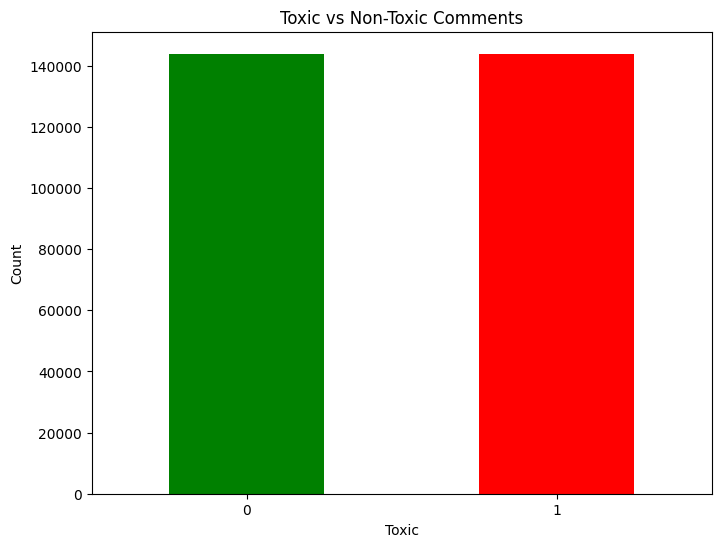

In [ ]:
# Bar plot for toxic vs non-toxic comments
plt.figure(figsize=(8, 6))
toxic_counts = train_os['Toxic'].value_counts()
toxic_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Toxic vs Non-Toxic Comments')
plt.xlabel('Toxic')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(type(x_train))
print(x_train[:5])

<class 'numpy.ndarray'>
['support proper term is battle of tripoli 2011 like battle of kandahar 2011 arkjedi10'
 'hilarious even without the en dash thing i keep reading post hotree fuck talk'
 'opinoso you are clearly biased in editing brazil information it has been documented how you have engaged in many editing wars like with donado with anyone who disagrees with your perception of the ethnicity of brazil you seem to want the ethnicity of brazil to conform to your own ethnicity apparently portuguese italian and african and you seem to be fighting with an obsession any different ethnicities in brazil than your own like the true number of german brazilians please just stop editing on brazil'
 'you all think you are fucking experts because you control the information on wikiplagirism you are all at fault for contributing to the age of misinformation no longer does academic fact stand for anything now it is all about majority fool you stupid fucks you are destroying our world eat shit l

In [ ]:

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:

# # Extract the text and labels from the DataFrame
# texts = df['Text'].tolist()  # list of comments
# labels = df['Toxic'].tolist()  # list of labels


def tokenize_data(texts):
    return tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors='pt')
# Apply tokenization
#encodings = tokenize_data(texts)

In [ ]:
# Convert numpy arrays to lists of strings
x_train = x_train.astype(str).tolist()
x_test = x_test.astype(str).tolist()

# Tokenize the train and test sets separately
train_encodings = tokenize_data(x_train)
test_encodings = tokenize_data(x_test)


In [ ]:
import torch
from torch.utils.data import Dataset

class ToxicCommentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Create dataset objects for training and testing
train_dataset = ToxicCommentDataset(train_encodings, y_train)
test_dataset = ToxicCommentDataset(test_encodings, y_test)


In [ ]:
from torch.utils.data import DataLoader

# Define batch size
batch_size = 16

# Create DataLoader for train and test datasets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
from transformers import BertForSequenceClassification

# Load BERT model for sequence classification with 2 output labels (toxic or non-toxic)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Total training steps = batches per epoch * number of epochs
total_steps = len(train_loader) * 3  # Assuming 3 epochs

# Learning rate scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=total_steps)


/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from torch.nn import CrossEntropyLoss
from tqdm import tqdm  # For progress bars

# Training function
def train_model(model, train_loader, optimizer, scheduler, device):
    model.train()  # Set model to training mode
    total_loss = 0

    for batch in tqdm(train_loader):
        optimizer.zero_grad()  # Clear gradients

        # Move batch to device (GPU or CPU)
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        # Backward pass
        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Training loss: {avg_loss}")

# Train the model for a number of epochs
epochs = 3
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    train_model(model, train_loader, optimizer, scheduler, device)


Epoch 1/3


  0%|          | 0/14389 [00:00<?, ?it/s]/tmp/ipykernel_31/3991761066.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|██████████| 14389/14389 [46:07<00:00,  5.20it/s]


Training loss: 0.11009409261115717
Epoch 2/3


100%|██████████| 14389/14389 [46:00<00:00,  5.21it/s]


Training loss: 0.030108030294061037
Epoch 3/3


100%|██████████| 14389/14389 [45:59<00:00,  5.21it/s]

Training loss: 0.008473929323897813


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [ ]:
import torch
import torch.nn.functional as F
from sklearn.metrics import classification_report, accuracy_score
from torch.nn import CrossEntropyLoss

# Evaluation function with loss and classification report
def evaluate_model(model, test_loader, device):
    model.eval()  # Set model to evaluation mode
    predictions, true_labels = [], []
    total_loss = 0  # Initialize total loss
    loss_fn = CrossEntropyLoss()

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            # Forward pass
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            # Calculate loss for the batch
            loss = loss_fn(logits, labels)
            total_loss += loss.item()

            # Get predictions
            predicted_class = torch.argmax(logits, dim=1)
            predictions.extend(predicted_class.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)

    # Calculate average loss for the epoch
    avg_loss = total_loss / len(test_loader)

    # Classification report
    class_report = classification_report(true_labels, predictions, target_names=['non-toxic', 'toxic'])

    # Print evaluation results
    print(f"Test Accuracy: {accuracy}")
    print(f"Average Loss: {avg_loss}")
    print("\nClassification Report:\n", class_report)

    return accuracy, avg_loss, class_report

# Example of calling the evaluation function
accuracy, avg_loss, class_report = evaluate_model(model, test_loader, device)


/tmp/ipykernel_31/3991761066.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Test Accuracy: 0.9924592556555583
Average Loss: 0.03532861449410499

Classification Report:
               precision    recall  f1-score   support

   non-toxic       1.00      0.99      0.99     28665
       toxic       0.99      1.00      0.99     28889

    accuracy                           0.99     57554
   macro avg       0.99      0.99      0.99     57554
weighted avg       0.99      0.99      0.99     57554



/tmp/ipykernel_31/3991761066.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Test Accuracy: 0.9924592556555583
Average Loss: 0.03532861449410499

Classification Report:
               precision    recall  f1-score   support

   non-toxic       1.00      0.99      0.99     28665
       toxic       0.99      1.00      0.99     28889

    accuracy                           0.99     57554
   macro avg       0.99      0.99      0.99     57554
weighted avg       0.99      0.99      0.99     57554



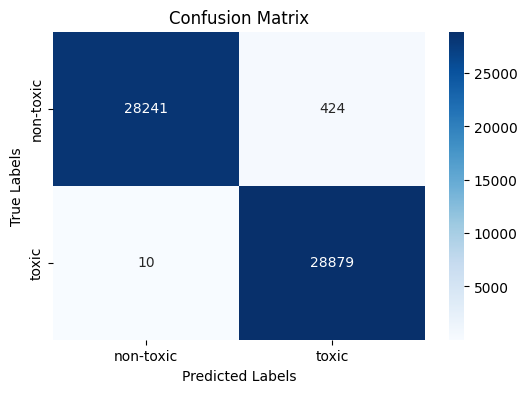

In [ ]:
import torch
import torch.nn.functional as F
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from torch.nn import CrossEntropyLoss
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluation function with loss, classification report, and confusion matrix
def evaluate_model(model, test_loader, device):
    model.eval()  # Set model to evaluation mode
    predictions, true_labels = [], []
    total_loss = 0  # Initialize total loss
    loss_fn = CrossEntropyLoss()

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            # Forward pass
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            # Calculate loss for the batch
            loss = loss_fn(logits, labels)
            total_loss += loss.item()

            # Get predictions
            predicted_class = torch.argmax(logits, dim=1)
            predictions.extend(predicted_class.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)

    # Calculate average loss for the epoch
    avg_loss = total_loss / len(test_loader)

    # Classification report
    class_report = classification_report(true_labels, predictions, target_names=['non-toxic', 'toxic'])

    # Confusion matrix
    cm = confusion_matrix(true_labels, predictions)

    # Print evaluation results
    print(f"Test Accuracy: {accuracy}")
    print(f"Average Loss: {avg_loss}")
    print("\nClassification Report:\n", class_report)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['non-toxic', 'toxic'], yticklabels=['non-toxic', 'toxic'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    return accuracy, avg_loss, class_report, cm

# Example of calling the evaluation function
accuracy, avg_loss, class_report, cm = evaluate_model(model, test_loader, device)


In [ ]:
import torch

# Saving the model
def save_model(model, file_path):
    """
    Save the model state_dict to a file.
    Args:
        model (torch.nn.Module): The model to be saved.
        file_path (str): Path where the model will be saved.
    """
    torch.save(model.state_dict(), file_path)
    print(f"Model saved to {file_path}")

# Example usage
save_model(model, "bert_toxic_classification_model.pth")


Model saved to bert_toxic_classification_model.pth
